## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 10: Review
## Due 15 December, 2019 at 11:59 PM
### Kevin Egedy

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Choose **<u>one</u>** of the following problems. Solve the problem and then write up your solution in a stand alone Jupyter Notebook. Your notebook should have the following elements:

- Problem statement
- Mathematical description of the solution
- Executable code, commented, clear code

You will be graded on how well your notebook reads like a nicely formated, well written report. You must:

- Write mathematical descriptions using complete sentences, paragraphs, and LaTeX formulas. 
- Comment your code as necessary, with a description of what each function does and all major steps.
- Label plots axes, use legends, and use plot titles. 

# Differential Equations for Neural Networks

The computational neural networks we have been studying are quite far from what is happening in biology. A slightly more realistic model is to admit that each neuron $i$ in a network has a time varying firing rate $x_i$, for $i$ equal $1$ to $n$. We let $W \in \mathbb{R}^{n \times n}$ be weight matrix, and $b \in \mathbb{R}^n$. The dynamics of such a neural network are

$$
\dot x_i = g \left (
\sum_{j=1}^n w_{i,j} x_j + b_i
\right )
$$

where is the nonlinearity

$$
g(x) = \frac{1}{1+e^{-x}} - \frac{1}{2} .
$$

*a)* Show through simulation that the matrix 

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 

<hr>

In [1]:
import math
import numpy as np
import sympy as sp
from sympy import lambdify
sp.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import networkx as nx
import random
import scipy
import scipy.ndimage
import scipy.integrate as spi
from mpl_toolkits.mplot3d import Axes3D 
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pprint
pp = pprint.PrettyPrinter(indent=4)

*a)* Show through simulation that the matrix 

$$
W = - \begin{pmatrix}
1 & 2 & 0 \\
0 & 1 & 2 \\
2 & 0 & 1
\end{pmatrix}
$$

with $b = 0$ results in oscillations. This is called a ring oscillator. Draw a graph representation of it. Now show through simulation that a ring of $n$ neurons so arranged oscillates when $n$ is odd, but not when it is even.

http://genomics.princeton.edu/rajan/downloads/papers/Rajan2005.pdf

https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=7827982 

In [2]:
# nonlinearity relationship betweenfiring rate and current 
def g(x):
    return 1/(1+np.exp(-x))-(1/2)

#  presynaptic neuron firing rate
def generate_initial_cond(N):
    return np.random.uniform(0,2,size=N)

In [3]:
# 
def firing_rates(init,t,W,b,neurons):
    X = init
    N = int(neurons)
    X_rate = [0]*N
    for i in range(N):
        # dynamics        
        s = 0
        for j in range(N):
            s += W[i,j]*X[j]+b[i]
        X_rate[i] = g(s)
    return X_rate

In [4]:
# neurons
N = 3

# weight matrix
W = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
])

# bias
b = np.zeros(N)

# time
t = np.linspace(0., 100, 6000)

In [5]:
# Format Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eigs = [eig.evalf() for eig in eigs]
for i,eig in enumerate(eigs):
    eig = complex(eig)
    if round(eig.real,2)==0 and round(eig.imag,2)==0:
        eigs[i] = 0
    else:
        eigs[i] = complex(round(eig.real,2),round(eig.imag,2))
eigs

[(-3+0j), -1.73j, 1.73j]

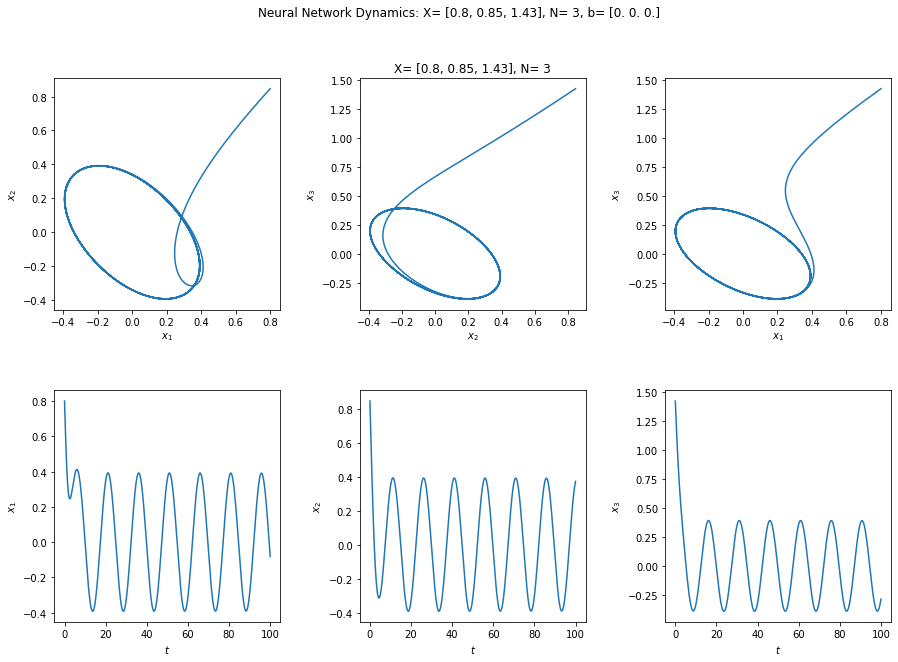

In [6]:
fig,axs = plt.subplots(2,3,figsize=(15,10))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)

#X = [-0.65, 0.20, 0.34]  # These conditions provide nicely shaped oscillations
X = generate_initial_cond(N)
trajectory0 = spi.odeint(firing_rates,X,t,args=(W,b,N))

X = [round(x,2) for x in X]  # Format to fit on graph
axs[0,0].plot(trajectory0[:,0],trajectory0[:,1])
axs[0,0].set_xlabel("$x_1$")
axs[0,0].set_ylabel("$x_2$")

axs[0,1].plot(trajectory0[:,1],trajectory0[:,2])
axs[0,1].set_xlabel("$x_2$")
axs[0,1].set_ylabel("$x_3$")
axs[0,1].set_title(f"X= {X}, N= {N}")

axs[0,2].plot(trajectory0[:,0],trajectory0[:,2])
axs[0,2].set_xlabel("$x_1$")
axs[0,2].set_ylabel("$x_3$")

axs[1,0].plot(t,trajectory0[:,0])
axs[1,0].set_xlabel("$t$")
axs[1,0].set_ylabel("$x_1$")

axs[1,1].plot(t,trajectory0[:,1])
axs[1,1].set_xlabel("$t$")
axs[1,1].set_ylabel("$x_2$")

axs[1,2].plot(t,trajectory0[:,2])
axs[1,2].set_xlabel("$t$")
axs[1,2].set_ylabel("$x_3$")

plt.suptitle(f"Neural Network Dynamics: X= {X}, N= {N}, b= {b}")
plt.show();

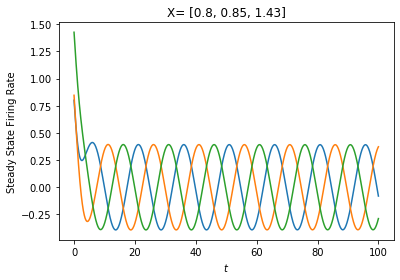

In [7]:
fig, ax = plt.subplots()

# Plot t vs trajectory0
ax.plot(t,trajectory0[:,0],label="$x_1$")
ax.plot(t,trajectory0[:,1],label="$x_2$")
ax.plot(t,trajectory0[:,2],label="$x_3$")

# Labels
ax.set_xlabel("$t$")
ax.set_ylabel("Steady State Firing Rate")
ax.set_title(f"X= {X}");

In [8]:
# Format Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eigs = [complex(eig.evalf()) for eig in eigs]
for i,eig in enumerate(eigs):
    eigs[i] = complex(round(eig.real,2),round(eig.imag,2))

W,
eigs

(array([[-1, -2,  0],
        [ 0, -1, -2],
        [-2,  0, -1]]),)

[(-3+0j), -1.73j, 1.73j]

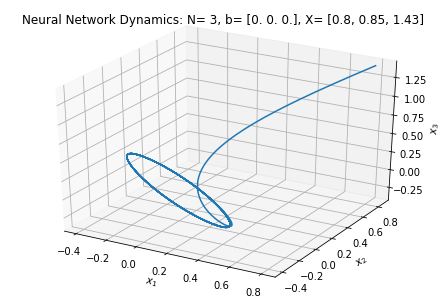

In [9]:
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.plot(trajectory0[:,0],trajectory0[:,1],trajectory0[:,2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_title(f"Neural Network Dynamics: N= {N}, b= {b}, X= {X}")
plt.show();

In [10]:
# neurons
N = 2

# weight matrix
W = -np.array([
    [1,2,0],
    [0,1,2],
    [2,0,1]
])

# bias
b = np.zeros(N)

# time
t = np.linspace(0., 100, 6000)

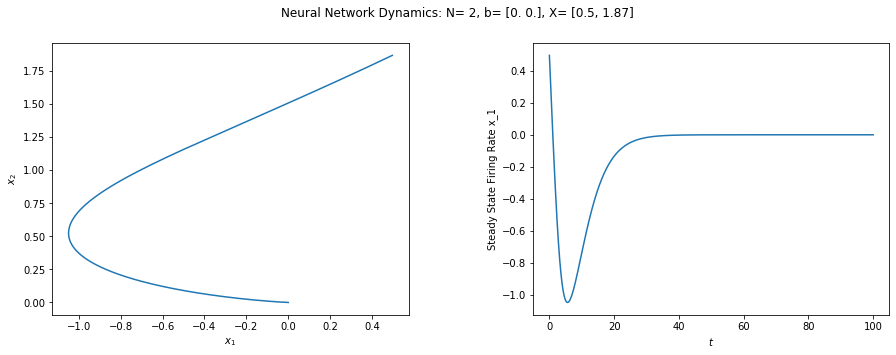

In [11]:
fig,axs = plt.subplots(1,2,figsize=(15,5))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)

X = generate_initial_cond(N)
trajectory1 = spi.odeint(firing_rates,X,t,args=(W,b,N))

X = [round(x,2) for x in X]  # Format to fit on graph
axs[0].plot(trajectory1[:,0],trajectory1[:,1])
axs[0].set_xlabel("$x_1$")
axs[0].set_ylabel("$x_2$")

axs[1].plot(t,trajectory1[:,0])
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("Steady State Firing Rate x_1")

plt.suptitle(f"Neural Network Dynamics: N= {N}, b= {b}, X= {X}")
plt.show();

<hr>

*b)* Define $W$ and $b$ so that the resulting network is bistable. That is, when one neuron is on in steady state, another is off, and *vice versa*. Simulate the system with different initial conditions. Draw a graph representation of your network.

https://www.frontiersin.org/articles/10.3389/fncom.2019.00019/full

https://math.mit.edu/~jorloff/suppnotes/suppnotes03/gs78.pdf

**Eigenvalue structures**

- Real, distinct: $
\begin{cases} \lambda_1,\lambda_2>0 \implies \text{Unstable node}\\ \lambda_1,\lambda_2<0 \implies \text{Stable node}\\ \text{one positive, one negative} \implies \text{Saddle point}\end{cases}$
<br><br>
- Real, repeated: $
\begin{cases} \text{two LI eigenvectors} \implies \text{Singular node (could be stable or not)}\\ \text{one LI eigenvector} \implies \text{Degenerate node (could be stable or not)} \end{cases}$
<br><br>
- Real, one zero eigenvalue: marginally stable
<br><br>
- Complex: $
\begin{cases} Re(\lambda)<0 \implies  \text{Stable focus (i.e. a sprial going toward the center node)} \\ Re(\lambda)>0 \implies  \text{Unstable focus (i.e. a sprial going away the center node)} \\ Re(\lambda)=0  \implies \text{Center node in which the trajectories are circles/ellipses} \end{cases}$

In [12]:
# Define A
j,k,l = sp.symbols('j,k,l')
W = -np.array([
    [1+j,2+k,0+l],
    [0+l,1+j,2+k],
    [2+k,0+l,1+j]
])

# Find Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eigs

⎡                     k   √3⋅ⅈ⋅k   l   √3⋅ⅈ⋅l              k   √3⋅ⅈ⋅k   l   √3
⎢-j - k - l - 3, -j + ─ - ────── + ─ + ────── - √3⋅ⅈ, -j + ─ + ────── + ─ - ──
⎣                     2     2      2     2                 2     2      2     

⋅ⅈ⋅l       ⎤
──── + √3⋅ⅈ⎥
2          ⎦

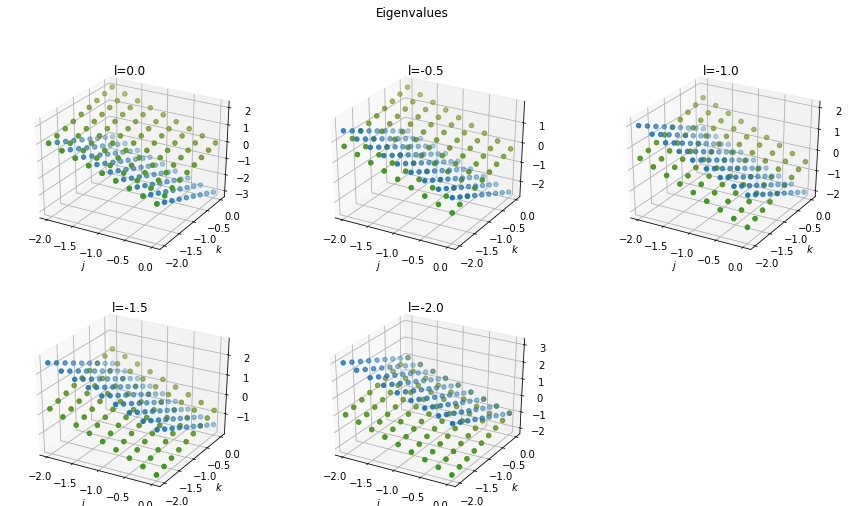

In [13]:
eig0 = lambdify([j,k,l], eigs[0])
eig1 = lambdify([j,k,l], eigs[1])
eig2 = lambdify([j,k,l], eigs[2])

J,K = np.meshgrid(np.linspace(-2, 0, 9),np.linspace(-2, 0, 9))
fig = plt.figure(figsize=(15,8))
fig.suptitle(f'Eigenvalues')

for i,L in enumerate(np.linspace(0,-2,5)):
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    ax.scatter(J,K,np.real(eig0(J,K,L)))
    ax.scatter(J,K,np.real(eig1(J,K,L)))
    ax.scatter(J,K,np.real(eig2(J,K,L)))
    ax.set_title(f'l={L}')
    ax.set_xlabel("$j$")
    ax.set_ylabel("$k$")

plt.show();

In [14]:
# results in a single eigenvalue: 0 -> marginally stable
system = sp.Matrix(eigs)
eq = sp.solve(system)
eq

{j: -1, k: -2, l: 0}

In [15]:
# neurons
N = 3

# weight matrix
def generate_stable_weights(N):
    W = None
    j,k,l = sp.symbols('j,k,l')
    W = -sp.Matrix([
        [1+j,2+k,0+l],
        [0+l,1+j,2+k],
        [2+k,0+l,1+j]
    ])
    J,K,L=None,None,None
    #J,K,L = -0.05,-0.48,-0.23
    while(1):
        J=random.uniform(-.1,0)
        K=random.uniform(-.25,0)
        L=random.uniform(-.25,0)
        W = W.subs({j:J,k:K,l:L})
        eigs = list(W.eigenvals().keys())
        eigs = np.array([complex(eig.evalf()) for eig in eigs])
        eigs_real = eigs.real
        eigs_stable = eigs_real[eigs_real<=0]
        if eigs_stable.size==N:
            break
    nfunc = lambdify( (), W.subs({j:J,k:K,l:L}))
    return nfunc()

# bias -> defined by Weights (W)

# time
t = np.linspace(0., 100, 10000)

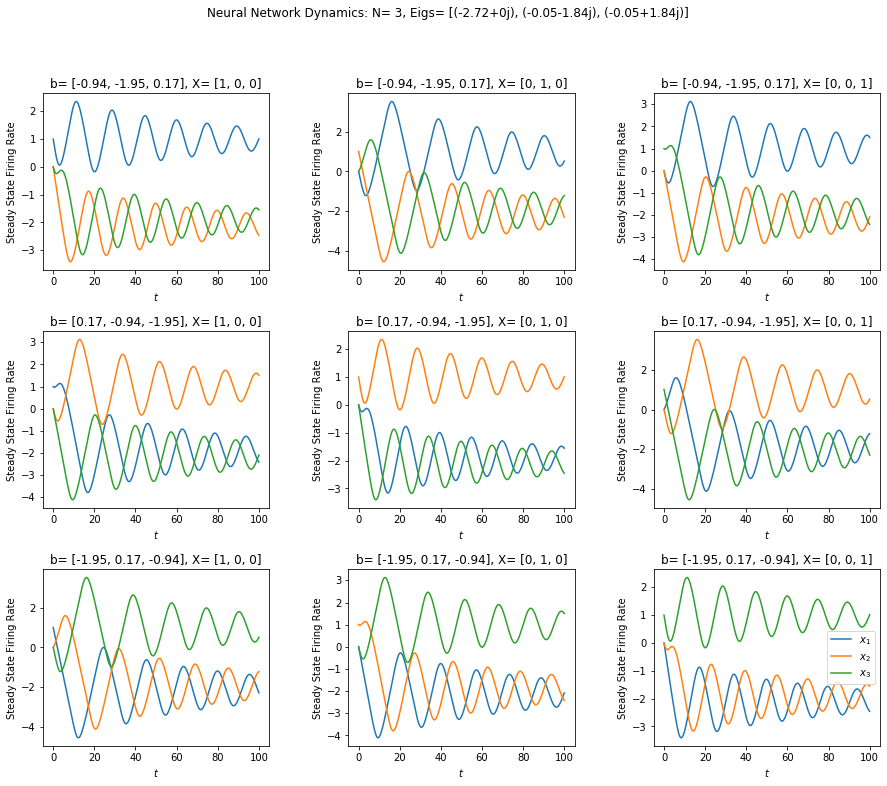

In [16]:
W = generate_stable_weights(N)

# Format Eigenvalues
_W = sp.Matrix(W)
eigs = list(_W.eigenvals().keys())
eigs = [complex(eig.evalf()) for eig in eigs]
for i,eig in enumerate(eigs):
    eigs[i] = complex(round(eig.real,2),round(eig.imag,2))

# Stable Plot
fig = plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)
plt.suptitle(f"Neural Network Dynamics: N= {N}, Eigs= {eigs}")

# Bias
B = [W[0,:],W[1,:],W[2,:]]

# Initial Conditions
X = [[1,0,0],[0,1,0],[0,0,1]]
#X = [[generate_initial_cond(N)],generate_initial_cond(N),generate_initial_cond(N)]

for i,b in enumerate(B):
    # Calculate Trajectory0
    x = X[0]
    trajectory0 = spi.odeint(firing_rates,x,t,args=(W,b,N))
    x = [round(xi,2) for xi in x]
    b = [round(bi,2) for bi in b]

    # Plot Trajectory0
    ax = fig.add_subplot(3, 3, 1+3*i)
    ax.plot(t,np.real(trajectory0[:,0]),label="$x_1$")
    ax.plot(t,np.real(trajectory0[:,1]),label="$x_2$")
    ax.plot(t,np.real(trajectory0[:,2]),label="$x_3$")
    ax.set_xlabel("$t$")
    ax.set_ylabel("Steady State Firing Rate")
    ax.set_title(f"b= {b}, X= {x}")
    
    # Calculate Trajectory1
    x = X[1]
    trajectory1 = spi.odeint(firing_rates,x,t,args=(W,b,N))
    x = [round(xi,2) for xi in x]

    # Plot Trajectory1
    ax = fig.add_subplot(3, 3, 2+3*i)
    ax.plot(t,np.real(trajectory1[:,0]),label="$x_1$")
    ax.plot(t,np.real(trajectory1[:,1]),label="$x_2$")
    ax.plot(t,np.real(trajectory1[:,2]),label="$x_3$")
    ax.set_xlabel("$t$")
    ax.set_ylabel("Steady State Firing Rate")
    ax.set_title(f"b= {b}, X= {x}")
    
    # Calculate Trajectory2
    x = X[2]
    trajectory2 = spi.odeint(firing_rates,x,t,args=(W,b,N))
    x = [round(xi,2) for xi in x]

    # Plot Trajectory2
    ax = fig.add_subplot(3, 3, 3+3*i)
    ax.plot(t,np.real(trajectory2[:,0]),label="$x_1$")
    ax.plot(t,np.real(trajectory2[:,1]),label="$x_2$")
    ax.plot(t,np.real(trajectory2[:,2]),label="$x_3$")
    ax.set_xlabel("$t$")
    ax.set_ylabel("Steady State Firing Rate")
    ax.set_title(f"b= {b}, X= {x}")

plt.legend()
plt.show();

In [17]:
W
eigs

array([[-0.94395923, -1.94990273,  0.17083789],
       [ 0.17083789, -0.94395923, -1.94990273],
       [-1.94990273,  0.17083789, -0.94395923]])

[(-2.72+0j), (-0.05-1.84j), (-0.05+1.84j)]

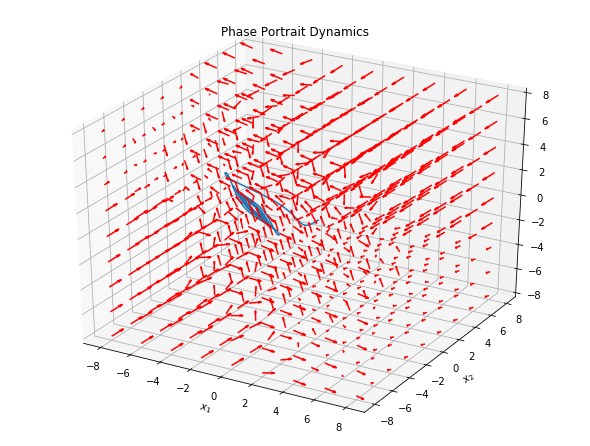

In [18]:
# Meshgrid
r1,r2,r3 = np.meshgrid(np.linspace(-8, 8, 9),np.linspace(-8, 8, 9),np.linspace(-8, 8, 9))
u,v,w = np.zeros(r1.shape),np.zeros(r2.shape),np.zeros(r3.shape)

# Firing Rates
for i in range(len(r1)):
    for j in range(len(r1)):
        for k in range(len(r1)):
            rdot = firing_rates([r1[i,j,k],r2[i,j,k],r3[i,j,k]],0,W,b,N)
            u[i,j,k] = rdot[0]
            v[i,j,k] = rdot[1]
            w[i,j,k] = rdot[2]

x = X[0]
trajectory0 = spi.odeint(firing_rates,x,t,args=(W,b,N))

# Phase Portrait
fig, ax = plt.subplots(figsize=(8,6))
ax = Axes3D(fig)

# Plot
ax.plot(trajectory0[:,0],trajectory0[:,1],trajectory0[:,2])
ax.quiver(r1,r2,r3,u,v,w,color='r')

# Labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Phase Portrait Dynamics')
  
plt.show();

<hr>

*c)* Build a network that contains two subnetworks that oscillate, that are connected in such a way that if one subnetwork oscillates, it prevents the other from oscillating, and *vice versa*. Simulate the system with different initial conditions to show the desired behavior. Draw a graph representation of your network.

In [19]:
# sub0 = sub1 = -np.array([
#     [1,2,0],
#     [0,1,2],
#     [2,0,1]
# ])

# weight matrix
def generate_network_weights(subnetworkN=3):
    N = subnetworkN
    p = random.uniform(0,.05)
    zeros = np.zeros((N,N))
    sub0 = generate_stable_weights(N) #fix this
    print(sub0)
    sub0 = sub0/sum(sub0[0,:])
    sub1 = generate_stable_weights(N)
    print(sub1)
    sub1 = sub1/sum(sub1[0,:])
    network = np.append(
        np.append(sub0,zeros,1),
        np.append(zeros,sub1,1), 0
    )
    network[N-1,N] = p
    network[N,N-1] = p
    return network

[[-0.90660438 -1.80293044  0.18606209]
 [ 0.18606209 -0.90660438 -1.80293044]
 [-1.80293044  0.18606209 -0.90660438]]
[[-0.98440259 -1.84582356  0.07622041]
 [ 0.07622041 -0.98440259 -1.84582356]
 [-1.84582356  0.07622041 -0.98440259]]
[[ 0.35926855  0.71446401 -0.07373255  0.          0.          0.        ]
 [-0.07373255  0.35926855  0.71446401  0.          0.          0.        ]
 [ 0.71446401 -0.07373255  0.35926855  0.03082416  0.          0.        ]
 [ 0.          0.          0.03082416  0.35744391  0.67023228 -0.0276762 ]
 [ 0.          0.          0.         -0.0276762   0.35744391  0.67023228]
 [ 0.          0.          0.          0.67023228 -0.0276762   0.35744391]]
[[ 0.35926855  0.71446401 -0.07373255  0.          0.          0.        ]
 [-0.07373255  0.35926855  0.71446401  0.          0.          0.        ]
 [ 0.71446401 -0.07373255  0.35926855  0.03082416  0.          0.        ]
 [ 0.          0.          0.03082416  0.35744391  0.67023228 -0.0276762 ]
 [ 0.        

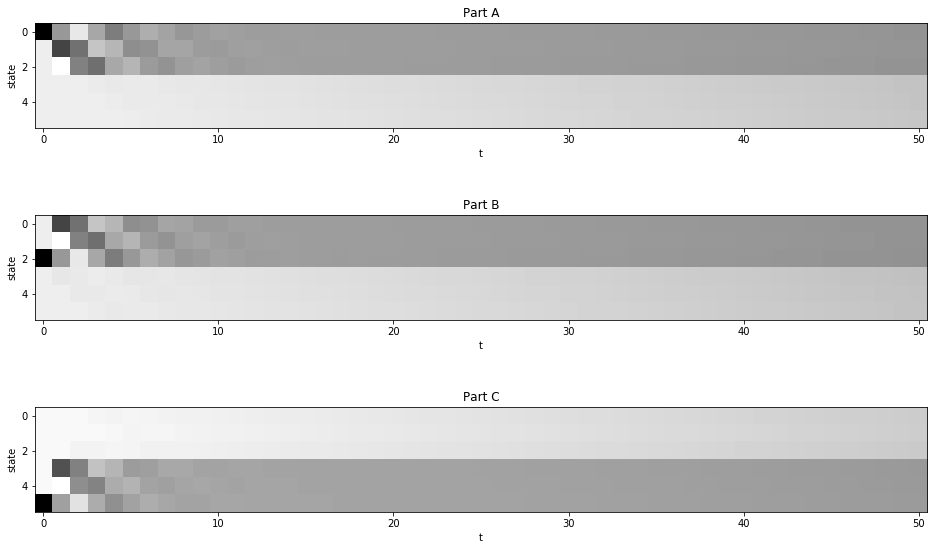

In [20]:
Q = generate_network_weights()

def network_dynamics(n, Q, p0):
    print(Q)
    '''
    Assumes n is the numer of steps
            Q is the update matrix
            p0 is the starting distribution.
    Returns a matrix of trajectories.
    '''
    # Define trajectory
    trajectory = [p0]
    
    # Probability vector p at every time step
    p = p0
    for _ in range(n):
        p = p.dot(Q)
        trajectory.append(p)
    
    # Numpy Matrix
    trajectory = np.matrix(trajectory).T

    return trajectory

# Trajectory A
#p0 = np.array([1,0,0])
p0 = np.array([1,0,0,0,0,0])
trajectoryA = network_dynamics(50,Q,p0)

# Trajectory B
#p0 = np.array([0,1,0])
p0 = np.array([0,0,1,0,0,0])
trajectoryB = network_dynamics(50,Q,p0)

# Trajectory C
#p0 = np.array([0,0,1])
p0 = np.array([0,0,0,0,0,1])
trajectoryC = network_dynamics(50,Q,p0)

# Plot
fig,axs = plt.subplots(3,1,figsize=(16,10))

axs[0].imshow(trajectoryA,cmap="gray_r")
axs[0].set_xlabel("t")
axs[0].set_ylabel("state")
axs[0].set_title('Part A')

axs[1].imshow(trajectoryB,cmap="gray_r")
axs[1].set_xlabel("t")
axs[1].set_ylabel("state")
axs[1].set_title('Part B')

axs[2].imshow(trajectoryC,cmap="gray_r")
axs[2].set_xlabel("t")
axs[2].set_ylabel("state")
axs[2].set_title('Part C');

In [21]:
# reachable stationary distribution
trajectoryA[:,-1].T*sp.Matrix(Q)

[0.379467771472481  0.376355576666801  0.381793613839331  0.18345329962691  0.
177859099285375  0.171560330701483]

*d)* Define $W \in \mathbb{R}^{n \times n}$ and $b \in \mathbb{R}^n$ with $n = 50$ to be a random neural network. 

Given a number $p \in [0,1]$, define a random matrix $A$ as follows. For each $i,j$, choose $r \in [0,1]$ randomly. Then put

$$
A_{i,j} = \left \{
\begin{array}{ll}
1 & \mathrm{if} & r \leq \frac{p}{2} \\
-1 & \mathrm{if} & \frac{p}{2} < r \leq p \\
0 & \mathrm{otherwise}.
\end{array}
\right .
$$

Then put 

$$
W = A - I
$$

where $I$ is the identity matrix. Through simulations with $n=20$, explain the various behaviors you can get with various values of $p$. 
|

In [22]:
Q

array([[ 0.35926855,  0.71446401, -0.07373255,  0.        ,  0.        ,
         0.        ],
       [-0.07373255,  0.35926855,  0.71446401,  0.        ,  0.        ,
         0.        ],
       [ 0.71446401, -0.07373255,  0.35926855,  0.03082416,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.03082416,  0.35744391,  0.67023228,
        -0.0276762 ],
       [ 0.        ,  0.        ,  0.        , -0.0276762 ,  0.35744391,
         0.67023228],
       [ 0.        ,  0.        ,  0.        ,  0.67023228, -0.0276762 ,
         0.35744391]])

In [23]:
# Draw the graph

# G = nx.from_numpy_array(np.array([
#     [1,2,0],
#     [0,1,2],
#     [2,0,1]
# ]))
break
G = nx.from_numpy_array(Q+min(Q))

fig,ax = plt.subplots(1,1,figsize=(10,10))
edge_colors = ["orange" if G.has_edge(u,v) else "gray" for u,v in G.edges]
edge_widths = [5 if G.has_edge(u,v) else 0.5 for u,v in G.edges]

nx.draw(G, 
        pos=nx.kamada_kawai_layout(G), 
        ax=ax,
        with_labels=True, 
        node_color='#444444',
        font_color="white",
        edge_color = 'gray',
        width = 0.5)

SyntaxError: 'break' outside loop (<ipython-input-23-18ea3210b64e>, line 11)